<img src="mesh_basic_with_markers.svg" width="50%"/>

For a basic mesh lattice with 50/50 coupler and without any phase modulation, gain/loss, or nonlinearity, the single step propagation (m+1) can be written as
$$\begin{aligned}
a_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(a_n^m + ib_n^m) \\
b_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(ia_{n+2}^m + b_{n+2}^m) \\
\end{aligned}$$
Here, $a$ and $b$ represents the complex amplitude of the pulse in the long loop and short loop, respectively. The index $m$ is the propagation step, and the index $n$ is the temporal position within one roundtrip of the pulses.

One thing that should not be confused is that in reality, the light pulse will acquire a $\pi/2$ phase shift when crossing the coupler (in contrast to passing the coupler), going from one loop to another, which is, however, shown as passing the coupler in the figure. 

Due to the periodicity of the lattice, we can assume a plane wave ansatz and obtain the dispersion relation (band structure).  
$$\begin{pmatrix}a_{n}^{m+2} \\ \\ b_{n}^{m+2}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{i\theta}$$


$$\begin{pmatrix}a_{n+2}^{m} \\ \\ b_{n+2}^{m}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{iQ}$$

we can get
$$2\cos(\theta) = \cos(Q)-1$$
so
$$\theta = \pm \cos^{-1}(\frac{\cos(Q)-1}{2})$$

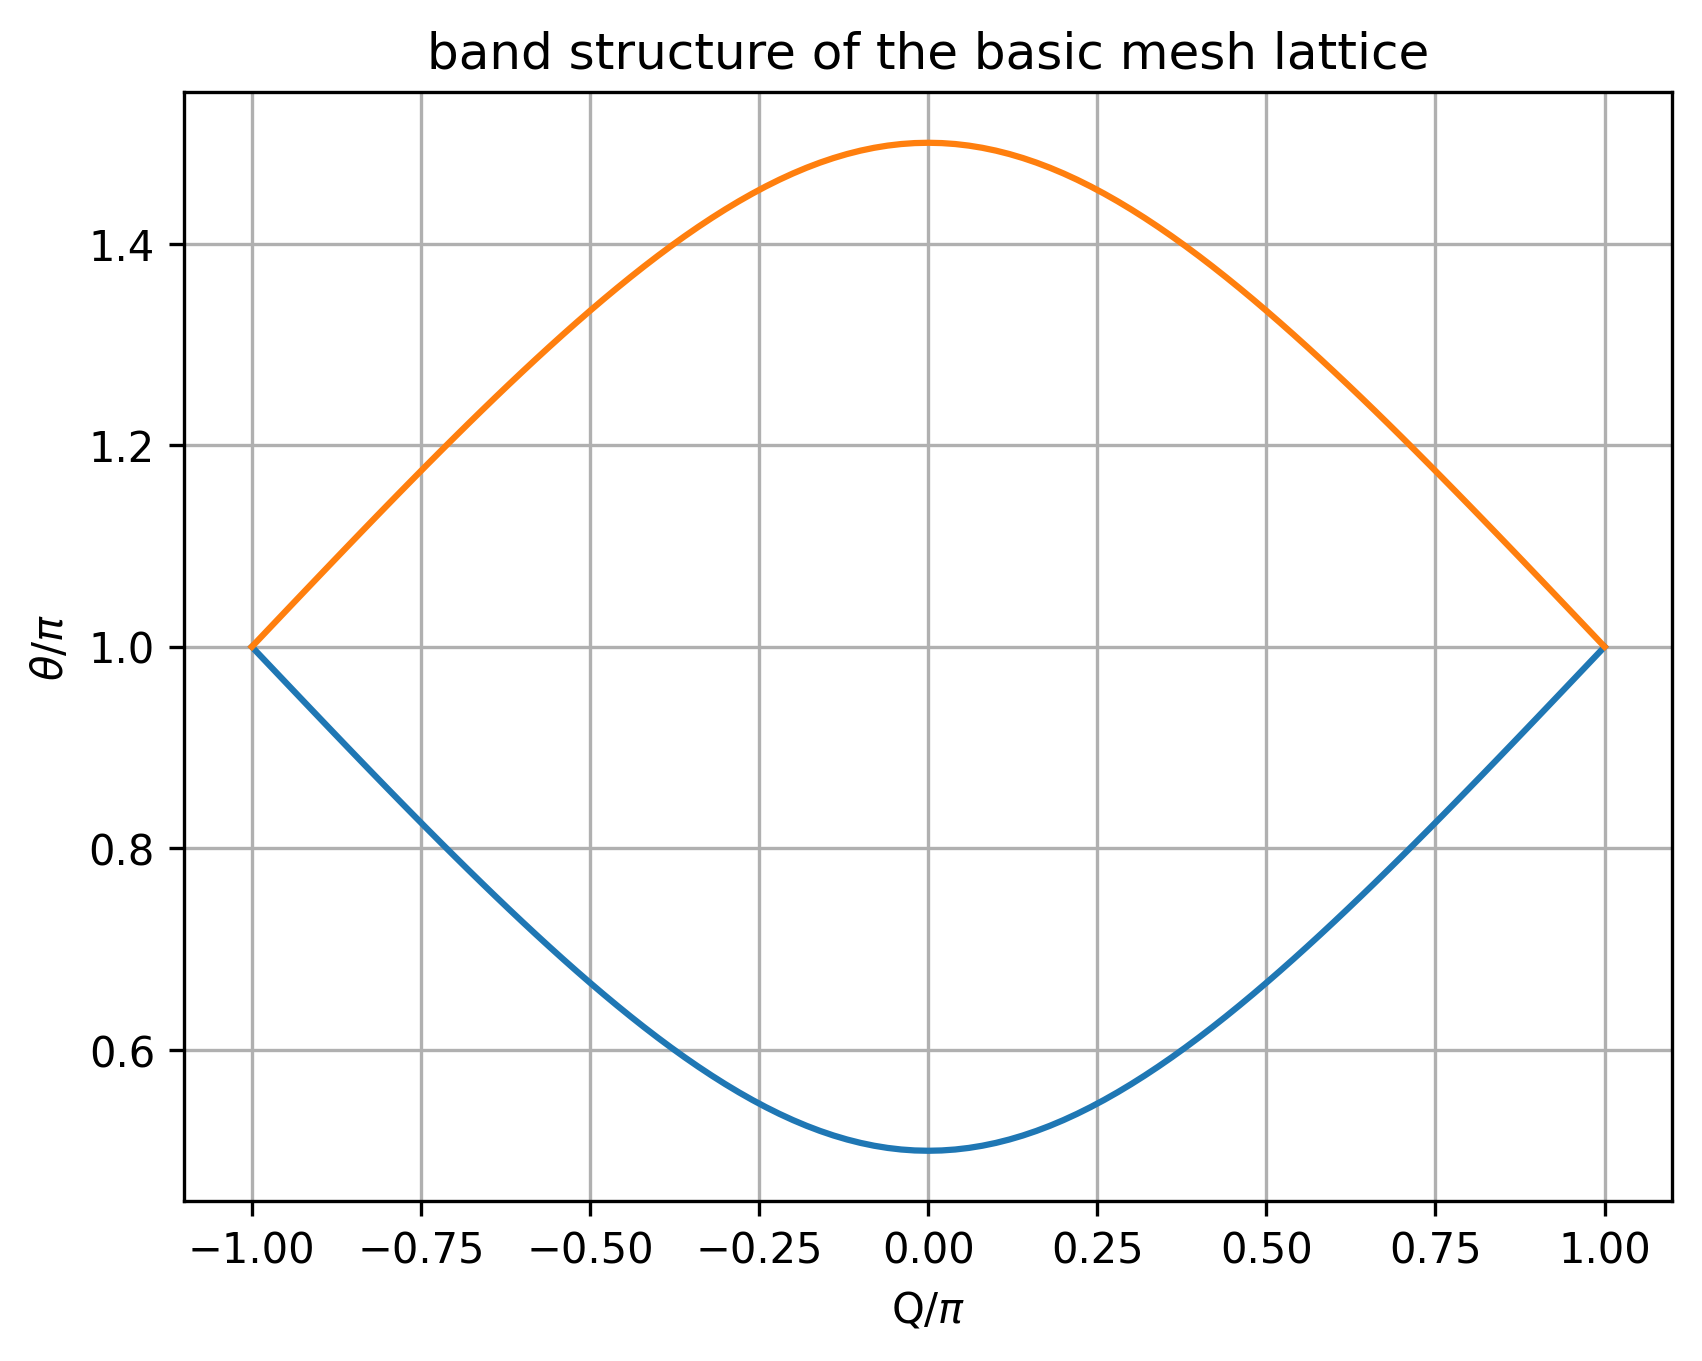

In [1]:
# draw the band structure
import numpy as np
import matplotlib.pyplot as plt
q = np.linspace(-1*np.pi,np.pi,num=101)
th1 = np.arccos((np.cos(q)-1)/2)
th2 = -1*th1 + 2*np.pi
plt.figure(dpi=300)
plt.plot(q/np.pi, th1/np.pi)
plt.plot(q/np.pi, th2/np.pi)
plt.xlabel(r"Q/$\pi$")
plt.ylabel(r"$\theta$/$\pi$")
plt.title("band structure of the basic mesh lattice")
plt.grid(True)
plt.show()

### On-site potential (in-loop phase modulation)
Now we add a phase modulation to each pulse in the long loop by following the scheme in Regensburger et al., Nature 488, 167–171 (2012)

$$\varphi(n) = \left\{ \begin{aligned} 
  -\varphi_0 \; &\mathrm{for}\; \mathrm{mod}(n+3;4)=0;1  \\
  +\varphi_0 \; &\mathrm{for}\; \mathrm{mod}(n+3;4)=2;3.
\end{aligned} \right.$$

When exciting the lattice with a single pulse at the position of $n=0$, the pulses in every roundtrip will only occupy either even or odd positions of $n$. By applying this phase modulation, we can get alternative phase modulation for the pulses within one roundtrip. 

<img src="mesh_phase_with_markers.svg" width="50%"/>

Now the evolution can be written as
$$\begin{aligned}
a_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(a_n^m + ib_n^m)e^{i\varphi(n+1)} \\
b_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(ia_{n+2}^m + b_{n+2}^m) \\
\end{aligned}$$
The plane wave ansatz now becomes
$$\begin{pmatrix}a_{n}^{m+2} \\ \\ b_{n}^{m+2}\end{pmatrix} = \begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{i\theta} $$

$$\begin{pmatrix}a_{n+4}^{m} \\ \\ b_{n+4}^{m}\end{pmatrix} = \begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{iQ} $$
From above we can again solve for the dispersion relation (band structure)

$$ \cos(Q) = 8\cos^2(\theta)+8\cos(\varphi_0)\cos(\theta)+4\cos^2(\varphi_0)-3$$

To get this equation, one can first get 4 equations for $a_0^0$, $b_0^0$, $a_2^0$, $b_2^0$ and write in matrix form $AX=0$, where $X$ is the 4 dimensional vector containing $a_0^0$, $b_0^0$, $a_2^0$, $b_2^0$ and $A$ is the 4x4 matrix containing $\theta$, $Q$, and $\varphi_0$. Then one can solve for the relation between $\theta$ and $Q$ by setting the determinant of $A$ to be 0. The calculation can be done by using the symbolic toolbox in MATLAB or by similar software. 

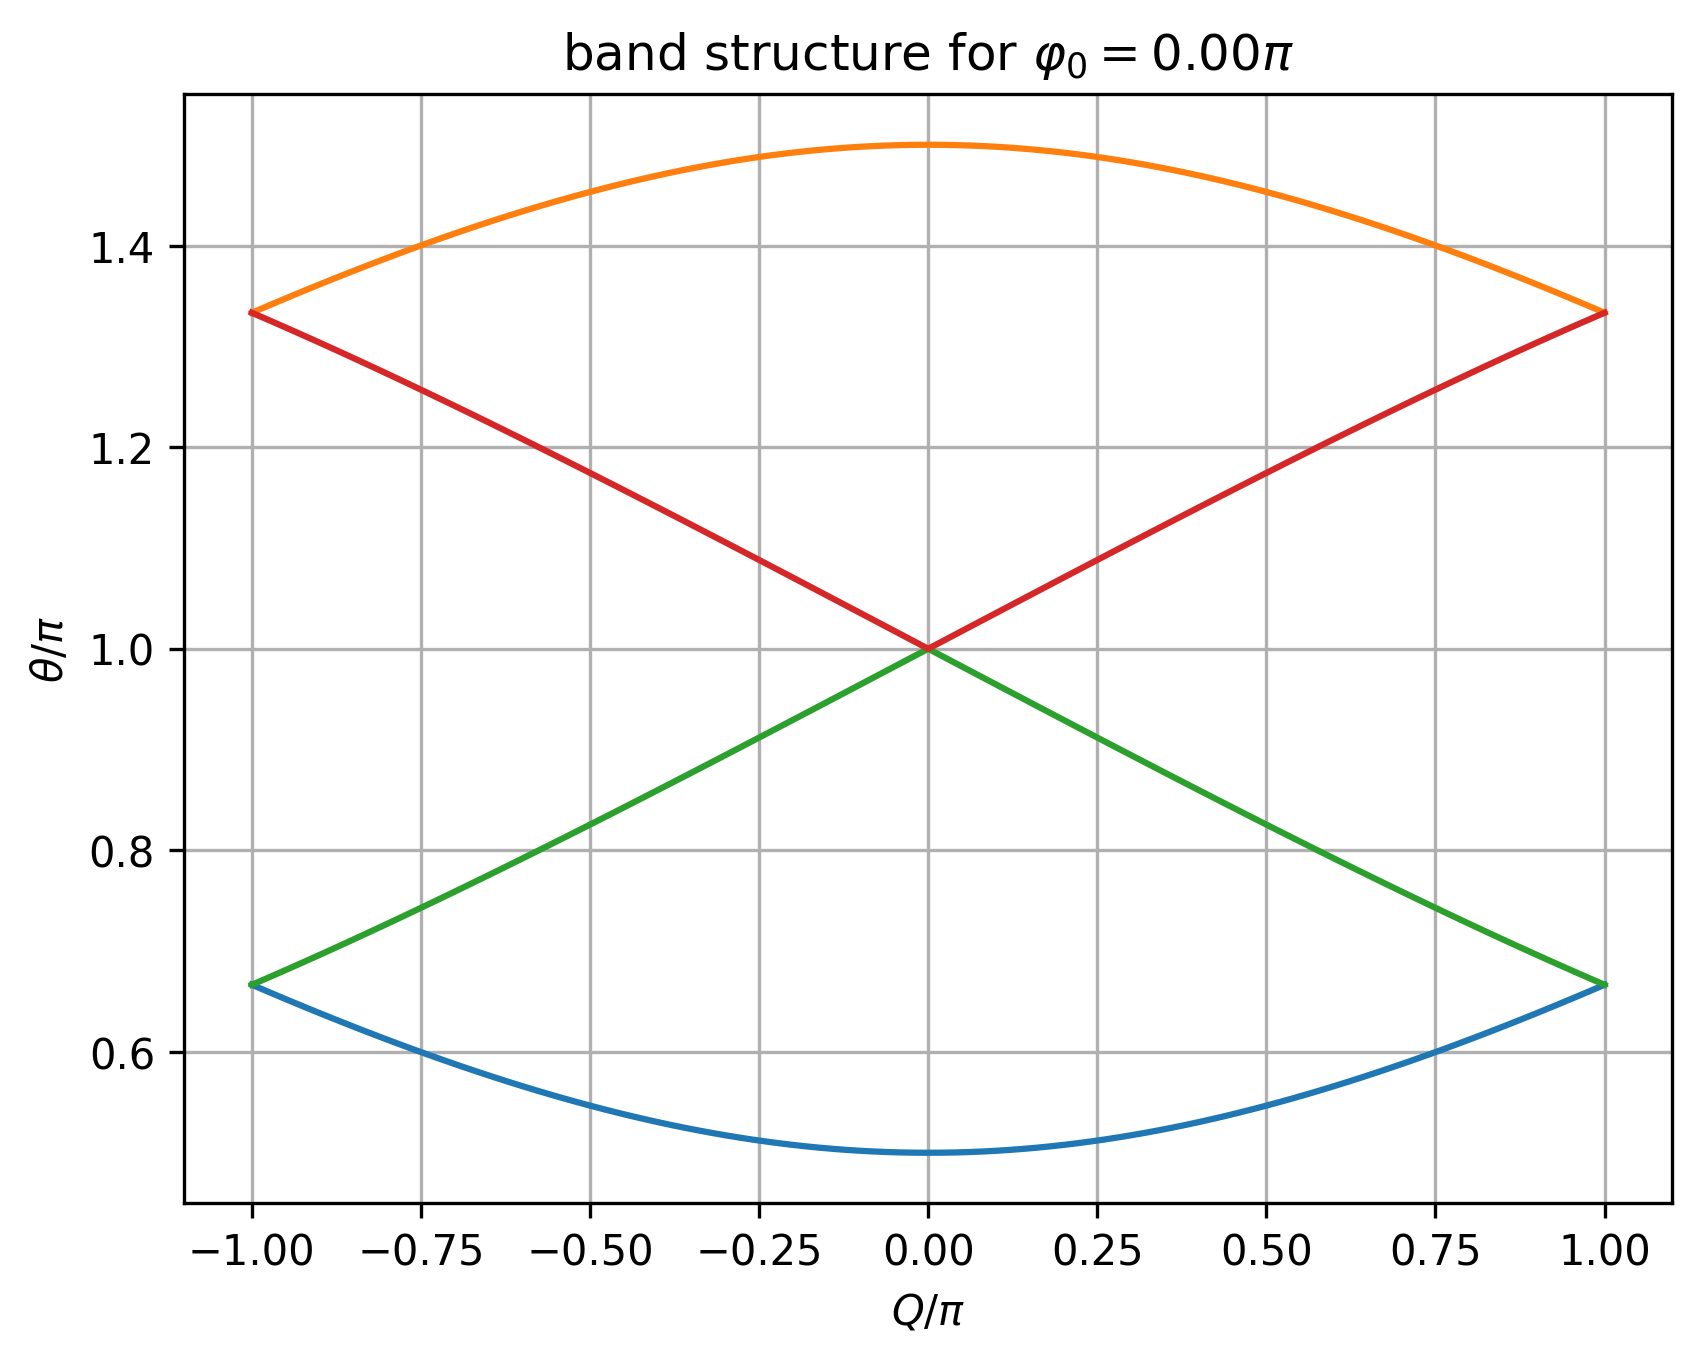

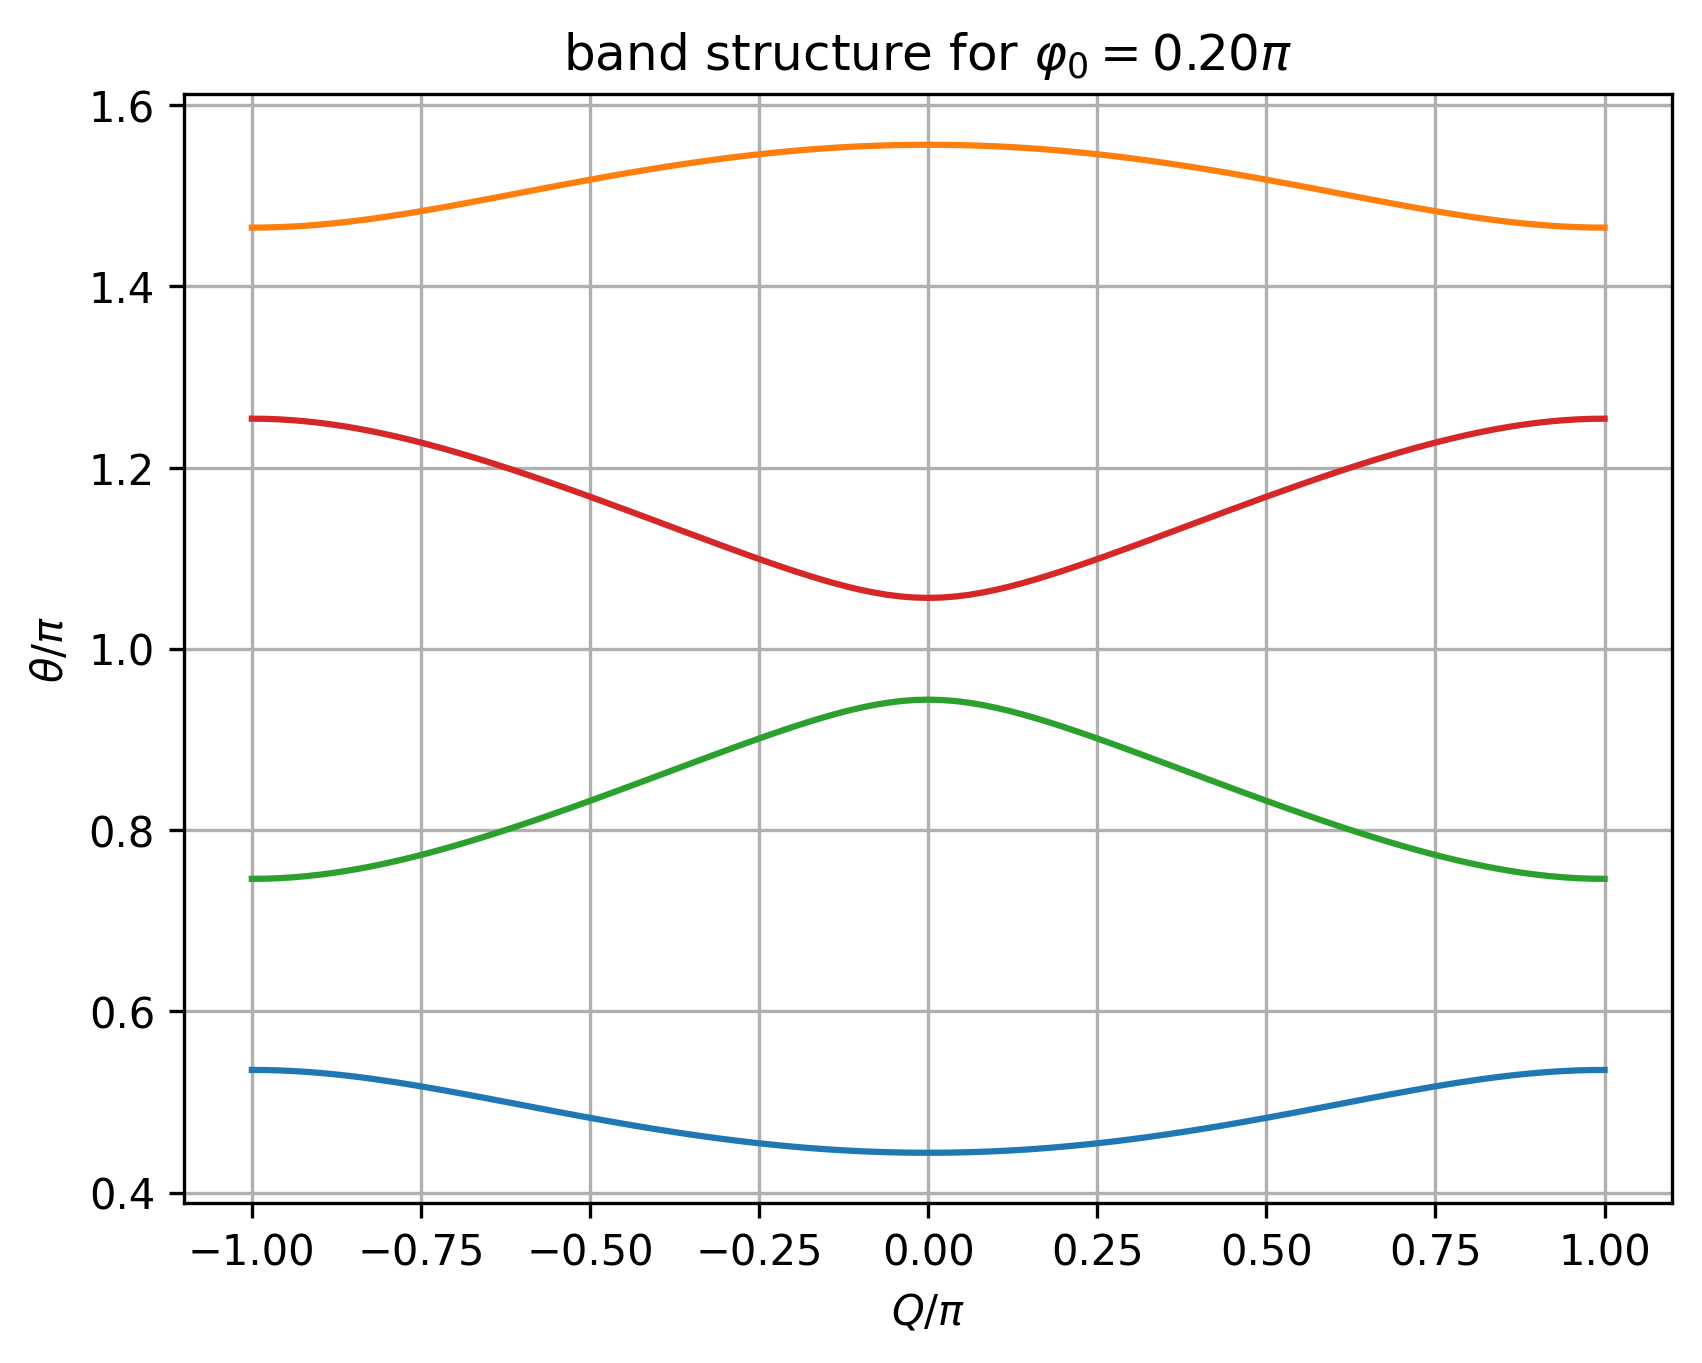

In [2]:
import numpy as np
import matplotlib.pyplot as plt

phi_values = [0, np.pi/5] # try 0, np.pi/5 and compare with Supplementary Figure 6 in Nature(2012)

for phi in phi_values:

    Q_array = np.linspace(-1*np.pi, np.pi, 101)

    theta11_array = []
    theta12_array = []
    theta21_array = []
    theta22_array = []

    for Q in Q_array:
        a = 8
        b = 8*np.cos(phi)
        c = 4*(np.cos(phi))**2-3-np.cos(Q)
        discriminant = b**2 - 4 * a * c
        z1 = (-b + np.sqrt(discriminant)) / (2 * a)
        z2 = (-b - np.sqrt(discriminant)) / (2 * a)
        
        theta11_array.append(np.arccos(z1))
        theta12_array.append(-1*np.arccos(z1))
        theta21_array.append(np.arccos(z2))
        theta22_array.append(-1*np.arccos(z2))

    # Convert lists to numpy arrays
    theta11_array = np.array(theta11_array)
    theta12_array = np.array(theta12_array)
    theta21_array = np.array(theta21_array)
    theta22_array = np.array(theta22_array)

    # Unwrap the theta values to make them continuous
    theta11_array_unwrapped = np.unwrap(theta11_array)
    theta12_array_unwrapped = np.unwrap(theta12_array) + 2*np.pi
    theta21_array_unwrapped = np.unwrap(theta21_array)
    theta22_array_unwrapped = np.unwrap(theta22_array) + 2*np.pi

    # Plot theta vs Q
    plt.figure(dpi=300)
    plt.plot(Q_array/np.pi, theta11_array_unwrapped/np.pi)
    plt.plot(Q_array/np.pi, theta12_array_unwrapped/np.pi)
    plt.plot(Q_array/np.pi, theta21_array_unwrapped/np.pi)
    plt.plot(Q_array/np.pi, theta22_array_unwrapped/np.pi)
    plt.title(r'band structure for $\varphi_0 = {:.2f}\pi$'.format(phi/np.pi))
    plt.xlabel(r'$Q/\pi$')
    plt.ylabel(r'$\theta/\pi$')
    plt.grid(True)

plt.show()


### Floquet SSH
<img src="mesh_SSH_with_markers.svg" width="50%"/>

$$\begin{aligned}
a_{n+1}^{m+1} &= \cos(\beta^m)a_n^m + i\sin(\beta^m)b_n^m \\
b_{n+1}^{m+1} &= i\sin(\beta^m)a_{n+2}^m + \cos(\beta^m)b_{n+2}^m \\
\end{aligned}$$
where
$$\beta^m = \left\{ \begin{aligned} 
  \beta_o,\; & m=1,3,5,...  \\
  \beta_e,\; & m=2,4,6,...
\end{aligned} \right.$$

The translational symmetry gives
$$\begin{pmatrix}a_{n}^{m+2} \\ \\ b_{n}^{m+2}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{i\theta}$$

$$\begin{pmatrix}a_{n+2}^{m} \\ \\ b_{n+2}^{m}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{iQ}$$

Use the equations above we can get:
$$
\begin{pmatrix}
A & B \\
C & D
\end{pmatrix}
\begin{pmatrix}
a_n^m \\
b_n^m
\end{pmatrix}
=
0
$$
where $A,B,C,D$ are expressions containing $Q,\theta,\beta_o,\beta_e$. 
$$
\begin{aligned}
A &= \cos(\beta_e)\cos(\beta_o)e^{-iQ} -\sin(\beta_e)\sin(\beta_o)-e^{i\theta}  \\
B &= i\cos(\beta_e)\sin(\beta_o)e^{-iQ} + i\sin(\beta_e)\cos(\beta_o) \\
C &= i\cos(\beta_e)\sin(\beta_o)e^{iQ} + i\sin(\beta_e)\cos(\beta_o)\\
D &= \cos(\beta_e)\cos(\beta_o)e^{iQ} -\sin(\beta_e)\sin(\beta_o)-e^{i\theta}
\end{aligned}
$$

To have non-zero solutions of $a_n^m,b_n^m$, we need the determinant of the ABCD matrix to be zero. We get

$$
\cos(\theta)= \cos(\beta_o)\cos(\beta_e)\cos(Q) -\sin(\beta_o)\sin(\beta_e)
$$
so 
$$\theta = \pm \cos^{-1}( \cos(\beta_o)\cos(\beta_e)\cos(Q) -\sin(\beta_o)\sin(\beta_e) )$$

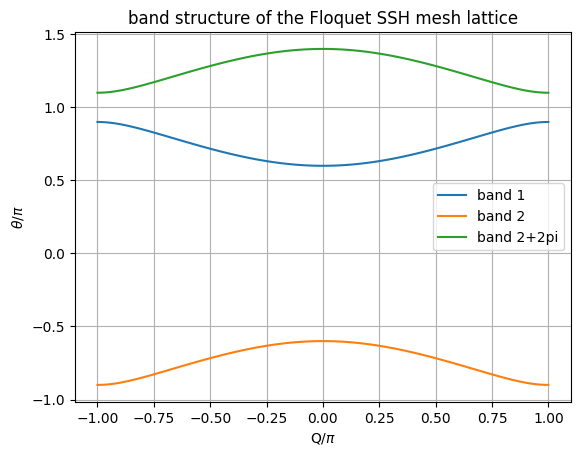

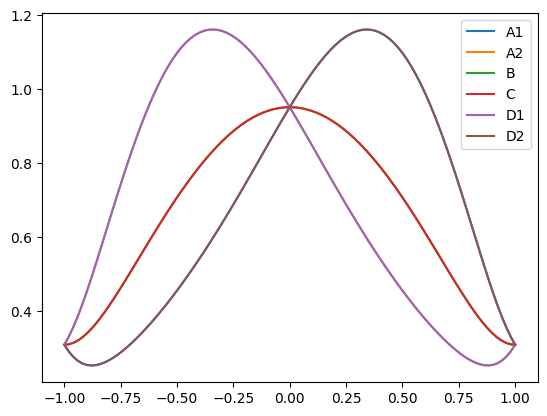

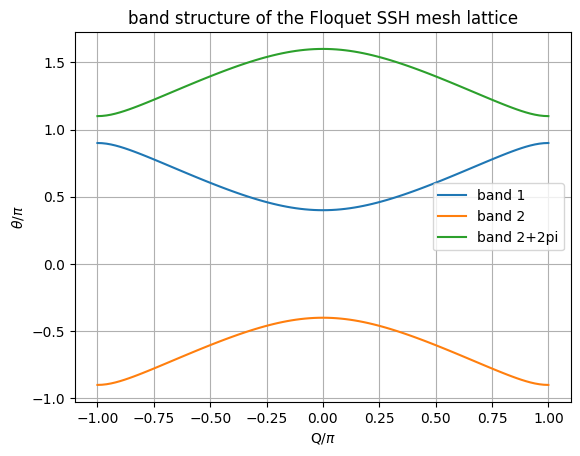

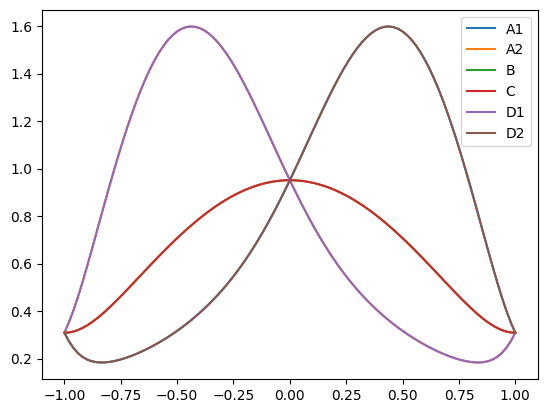

In [13]:
# draw the band structure
import numpy as np
import matplotlib.pyplot as plt
array_bo = [ 0.25*np.pi, 0.25*np.pi]
array_be = [ 0.35*np.pi, 0.15*np.pi]
# _solve_blochstates = 1

q = np.linspace(-1*np.pi,np.pi,num=101)
for bo,be in zip(array_bo,array_be):
    th1 = np.arccos( np.round(np.cos(bo)*np.cos(be)*np.cos(q)-np.sin(bo)*np.sin(be),6) )
    th2 = -1*th1 #+ 2*np.pi
    th2_2 = -1*th1 + 2*np.pi

    plt.figure()
    plt.plot(q/np.pi, th1/np.pi,label="band 1")
    plt.plot(q/np.pi, th2/np.pi,label="band 2")
    plt.plot(q/np.pi, th2_2/np.pi,label="band 2+2pi")
    plt.xlabel(r"Q/$\pi$")
    plt.ylabel(r"$\theta$/$\pi$")
    plt.title("band structure of the Floquet SSH mesh lattice")
    plt.legend()
    plt.grid(True)
    
    plt.figure()  # check ABCD is non-zero
    A1 = np.cos(be)*np.cos(bo)*np.exp(-1j*q)-np.sin(be)*np.sin(bo)-np.exp(1j*th1)
    A2 = np.cos(be)*np.cos(bo)*np.exp(-1j*q)-np.sin(be)*np.sin(bo)-np.exp(1j*th2)
    B = 1j*np.cos(be)*np.sin(bo)*np.exp(-1j*q)+1j*np.sin(be)*np.cos(bo)
    C = 1j*np.cos(be)*np.sin(bo)*np.exp(1j*q)+1j*np.sin(be)*np.cos(bo)
    D1 = np.cos(be)*np.cos(bo)*np.exp(1j*q)-np.sin(be)*np.sin(bo)-np.exp(1j*th1)
    D2 = np.cos(be)*np.cos(bo)*np.exp(1j*q)-np.sin(be)*np.sin(bo)-np.exp(1j*th2)
    plt.plot(q/np.pi,abs(A1),label="A1")
    plt.plot(q/np.pi,abs(A2),label="A2")
    plt.plot(q/np.pi,abs(B),label="B")
    plt.plot(q/np.pi,abs(C),label="C")
    plt.plot(q/np.pi,abs(D1),label="D1")
    plt.plot(q/np.pi,abs(D2),label="D2")
    plt.legend()

    # if _solve_blochstates == True:
    #     blochstate1 = np.array([1, -A1/B])
    #     blochstate2 = np.array([1, -A2/B])


plt.show()

We then solve for the Bloch state $a,b$ to satisfy 
$$
\begin{pmatrix}
A & B \\
C & D
\end{pmatrix}
\begin{pmatrix}
a_n^m \\
b_n^m
\end{pmatrix}
=
0
$$
for two $\theta$ at each $Q$. 
$$
\begin{aligned}
\vec{X_1} &= \frac{1}{\sqrt{1+\left| \frac{A_1}{B}  \right|^2}}
\begin{pmatrix}
1 \\
-\frac{A_1}{B}
\end{pmatrix} \\
\vec{X_2} &= \frac{1}{\sqrt{1+\left| \frac{A_2}{B}  \right|^2}}
\begin{pmatrix}
1 \\
-\frac{A_2}{B}
\end{pmatrix} \end{aligned}
$$
The Berry's phase (Zak phase) for each band is defined as 
$$
\gamma = i\int_0^{2\pi}\langle X | \partial_Q | X \rangle dQ
$$

The integral can be solved numerically for given $\beta_o,\beta_e$. Achieved values when fixing $\beta_o=0.25\pi$ are 0 ($\beta_e = 0.35\pi$), $-\pi$ ($\beta_e = 0.15\pi$). 

### Effective Hamiltonian of the SSH lattice
Here we try to analyze the Floquet SSH lattice in the framework of discrete-time quantum walk. We first define some notations:
$$
\begin{aligned}
\mathrm{Spin}:& \\
a: \left| \uparrow \right\rangle &= \left| 0 \right\rangle = \begin{pmatrix}
1\\0 \end{pmatrix} \\

b: \left| \downarrow \right\rangle &= \left| 1 \right\rangle = \begin{pmatrix}
0\\1 \end{pmatrix} \\

\mathrm{Pauli\; matrices}:& \\
 \sigma_x &= \begin{pmatrix}0 & 1 \\ 1 & 0 \end{pmatrix} \\
 \sigma_y &= \begin{pmatrix}0 & -i \\ i & 0 \end{pmatrix} \\
 \sigma_z &= \begin{pmatrix}1 & 0 \\ 0 & -1 \end{pmatrix} \\
 I &= \begin{pmatrix}1 & 0 \\ 0 & 1 \end{pmatrix} \\

\mathrm{Rotation\; operator}: \\
R(\beta) &= e^{i\beta \sigma_x} = \begin{pmatrix} \cos(\beta) & i\sin(\beta) \\ i\sin(\beta) & \cos(\beta) \end{pmatrix} \\

\end{aligned}
$$

The discrete-time quantum walk for a 2-spin particle is achieved by a rotation operator followed by a spin-dependent translation operator. For a finite, periodic lattice with $N$ sites, the translation operator is defined as
$$
T = \sum_{x=1}^{N} \left| x+1 \right\rangle \left\langle x \right|\otimes \left| \uparrow \right\rangle \left\langle \uparrow \right|  + \left| x-1 \right\rangle \left\langle x \right|\otimes \left| \downarrow \right\rangle \left\langle \downarrow \right|
$$
It can be verified that the evolution operator on the Floquet SSH lattice is
$$
U = TR(\beta_e)TR(\beta_o)
$$
Note that $U$ is $N/2 \times N/2$ dimension instead of $N \times N$ because only the odd sites can be taken for the input state and states after applying $U$. By transforming the position basis to the momentum basis, the evolution operator can be written as
$$
U = \sum_{k} \left| k \right\rangle \left\langle k \right| \otimes U_k,\; 
\mathrm{where}\; k = \frac{2\pi l}{N/2},\; l = 1,2,...,N/2
$$
where $\left| k \right\rangle = \frac{1}{\sqrt{N/2}}\sum_{n=1}^{N/2}e^{ikn}\left| 2n-1 \right\rangle$ is the Fourier-transformed state and $U_k$ is the $2\times 2$ matrix acting on the spin state:
$$
U_k = \begin{pmatrix}\scriptstyle \cos(\beta_e)\cos(\beta_o)e^{-ik} -\sin(\beta_e)\sin(\beta_o) & \scriptstyle 
i\cos(\beta_e)\sin(\beta_o)e^{-ik} + i\sin(\beta_e)\cos(\beta_o) \\ \scriptstyle 
i\cos(\beta_e)\sin(\beta_o)e^{ik} + i\sin(\beta_e)\cos(\beta_o) & \scriptstyle  
\cos(\beta_e)\cos(\beta_o)e^{ik} -\sin(\beta_e)\sin(\beta_o) \end{pmatrix}
$$
The Floquet theorem states that: 
$$
U_k \left| \psi_{k,E} \right\rangle = e^{-iE} \left| \psi_{k,E} \right\rangle
$$
This is equivalent to the ABCD matrix that we have derived before. The $k,E$ here correspond to $Q, -\theta$. The dispersion relation can be obtained in the same way. 
$$
\cos(E) =\cos(\beta_e)\cos(\beta_o)\cos(k)-\sin(\beta_e)\sin(\beta_o)
$$
The evolution operator is characterized by a rotation around an axis in the Bloch sphere and can be decomposed into the superposition of the Pauli matrices:
$$
U_k = R_n(\alpha) = e^{-i\frac{\alpha}{2}\vec n \cdot \vec \sigma} = \cos(\frac{\alpha}{2})I -i \sin(\frac{\alpha}{2}) \vec n \cdot \vec \sigma
$$

$$
\begin{aligned}
\cos(\frac{\alpha}{2}) &= \cos(\beta_e)\cos(\beta_o)\cos(k)-\sin(\beta_e)\sin(\beta_o) = \cos(E) \\
\vec n &= \frac{1}{\sin(E)}
\begin{pmatrix}
-\sin(\beta_o)\cos(\beta_e)\cos(k)-\cos(\beta_o)\sin(\beta_e) \\ 
-\sin(\beta_o)\cos(\beta_e)\sin(k) \\ 
\cos(\beta_o)\cos(\beta_e)\sin(k)
\end{pmatrix}
\end{aligned}
$$

There is a vector that is perpendicular to all the $\vec n$ for different $k$:
$$
\vec A = \begin{pmatrix}
0\\ \cos(\beta_o) \\ \sin(\beta_o) \end{pmatrix}
$$

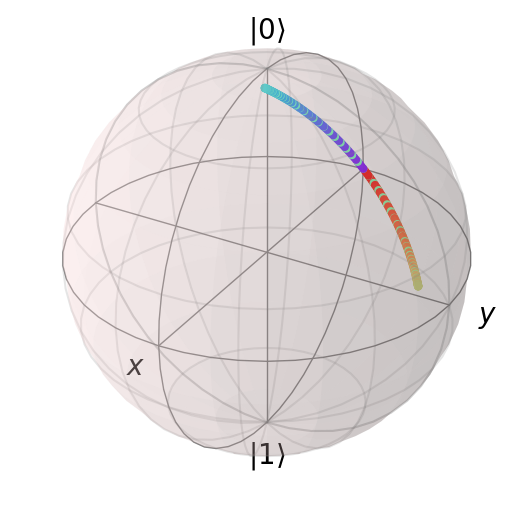

In [ ]:
# plot vector n on the Bloch sphere
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bo = 0.25*np.pi
be = 0.15*np.pi

b = qutip.Bloch()
b.make_sphere()
num_points = 200
k = np.linspace(0, 2*np.pi, num_points, endpoint=False)

xp = -np.sin(bo)*np.cos(be)*np.cos(k)-np.cos(bo)*np.sin(be)
yp = -np.sin(bo)*np.cos(be)*np.sin(k)
zp = np.cos(bo)*np.cos(be)*np.sin(k)

pnts = [xp, yp, zp]
norms = np.linalg.norm(pnts,axis=0)

pnts = np.divide(pnts,norms)
b.add_points(pnts) 

colors=[]
for i in range(num_points):
    color = plt.cm.rainbow(i / num_points)  # Color gradient from red to blue
    colors.append(color[:3])  # Extract RGB from RGBA
b.point_color = colors

# A = [0,np.cos(bo),np.sin(bo)]
# b.add_vectors(A)


b.render()
b.show()

### Map to continuous-time time-dependent Hamiltonian
<img src="Floquet SSH mapping.png" width="92%"/>
Weidemann, Non-hermitian topological photonics in coupled optical fibre loops (Universität Rostock, 2022) 


(Notice the difference in the definition of the position (m,n) in the two figures)


Let review what we have got so far. The full period of the light walk is: rotation, translation, rotation, and translation, which is
$$
U = TR(\beta_e)TR(\beta_o)
$$
where
$$
R(\beta) = \sum_{k} \left| k \right\rangle \left\langle k \right| \otimes e^{i\beta \sigma_x} =\sum_{k} \left| k \right\rangle \left\langle k \right| \otimes \begin{pmatrix} \cos(\beta) & i\sin(\beta) \\ i\sin(\beta) & \cos(\beta) \end{pmatrix} 
$$
and 
$$
T = \sum_{k} \left| k \right\rangle \left\langle k \right| \otimes \begin{pmatrix} e^{-ik/2} & 0 \\ 0 & e^{ik/2} \end{pmatrix} 
$$
To make the evolution operator symmetric, we shift the origin of time so that
$$
U = R(\beta_o/2)TR(\beta_e)TR(\beta_o/2)
$$
One problem for this formalism: the translation operator $T$ is problematic to diagonalize in k space. Since the definition of k vector previously only considers odd sites, so it becomes ill-defined when we try to describe the translation in k space. Maybe we can carefully redefine the k vector and continue this calculation, whereas we switch to another formulation which relates to the continuous-time model in a more straightforward way.

As shown in the left figure at the beginning of this section, the Floquet SSH lattice can be directly mapped to a periodically-driven 1D chain. Here the site index in the mesh lattice is no longer defined by the position of the coupler, but by pulses themselves in the two loops. The alternative coupling in the canonical SSH model is switch on and off alternatively, corresponding to a periodic modulation of the coupling. The good thing is that the coupling strength can be related to the splitting parameter $\beta$ in the couplers. 

We define the period to be $T=1$, corresponding to two steps of evolution in the mesh lattice or two roundtrips in the coupled fiber loops. And each step of evolution takes time $T/2$. 

We redefine our lattice as shown in the figure below (absent now). The Bloch Hamiltonian is
$$
H(k,t) = \begin{pmatrix} 0 & v(t)+w(t)e^{-ik} \\ v(t)+w(t)e^{ik} & 0 \end{pmatrix}
$$

where 
$$
v(t) = \left\{ \begin{aligned} 
  v,\; & 0\le t < \frac{T}{2}  \\
  0,\; & \frac{T}{2} \le t < T
\end{aligned} \right. ;\;  w(t) = \left\{ \begin{aligned} 
  0,\; & 0\le t < \frac{T}{2}  \\
  w,\; & \frac{T}{2} \le t < T
\end{aligned} \right.
$$
and $v(t+T)=v(t)$, $w(t+T)=w(t)$, $H(k,t+T)=H(k,t)$.

Now let's find the relation between $v,w$ and $\beta_o, \beta_e$.

The evolution of one step within a unit cell gives
$$
\begin{pmatrix} a(k,T/2) \\ b(k,T/2) \end{pmatrix} = \begin{pmatrix} i\sin(\beta) & \cos(\beta) \\ \cos(\beta) & i\sin(\beta)  \end{pmatrix} \begin{pmatrix} a(k,0) \\ b(k,0) \end{pmatrix} 
$$
Notice that here the $a,b$ swap between the long and short loops after passing through the coupler.

The evolution during the first half of the period can be solved as
$$
\begin{aligned}
a(k,\frac{T}{2}) &= \cos(v\frac{T}{2}) a(k,0) - i\sin(v\frac{T}{2}) b(k,0) \\
b(k,\frac{T}{2}) &= \cos(v\frac{T}{2}) b(k,0) - i\sin(v\frac{T}{2}) a(k,0)
\end{aligned}
$$

We can find that $v\frac{T}{2}=\frac{\pi}{2}-\beta$ makes the two set of equations equivalent, up to a global phase factor which does nothing to the physical observables. Since we have defined $T=1$ and the first setup to be $\beta_o$, we get
$$
v = \pi - 2\beta_o
$$

Similarly, the evolution during the second half of the period can be solved as
$$
\begin{aligned}
a(k,\frac{T}{2}) &= \cos(w\frac{T}{2}) a(k,0) - ie^{-ik}\sin(w\frac{T}{2}) b(k,0) \\
b(k,\frac{T}{2}) &= \cos(w\frac{T}{2}) b(k,0) - ie^{ik}\sin(w\frac{T}{2}) a(k,0)
\end{aligned}
$$
This looks like impossible to map back to the mesh lattice coupler. But we have to remember that this is the coupling between two different unit cells and hence the $e^{ik}$ factor is natural from the Bloch theorem. 
$$
\begin{pmatrix} a(k,T/2) \\ b(k,T/2) \end{pmatrix} = \begin{pmatrix} i\sin(\beta) & e^{-ik}\cos(\beta) \\ e^{ik}\cos(\beta) & i\sin(\beta)  \end{pmatrix} \begin{pmatrix} a(k,0) \\ b(k,0) \end{pmatrix}
$$
We can similarly get
$$
w = \pi - 2\beta_e
$$
By far, we have successfully mapped the discrete-time mesh lattice to a continuous-time Floquet SSH lattice.

We shift the time origin of the Hamiltonian by $T/4$ to make it symmetric:
$$
H(k,t) = \begin{pmatrix} 0 & v(t)+w(t)e^{-ik} \\ v(t)+w(t)e^{ik} & 0 \end{pmatrix}
$$

where 
$$
v(t) = \left\{ \begin{aligned} 
  v,\; & 0\le t < \frac{T}{4}  \\
  0,\; & \frac{T}{4} \le t < \frac{T}{2}   \\
  0,\; & \frac{T}{2} \le t < \frac{3T}{4}  \\
  v,\; & \frac{3T}{4} \le t < T
\end{aligned} \right. ;\;  w(t) = \left\{ \begin{aligned} 
  0,\; & 0\le t < \frac{T}{4}  \\
  w,\; & \frac{T}{4} \le t < \frac{T}{2}   \\
  w,\; & \frac{T}{2} \le t < \frac{3T}{4}  \\
  0,\; & \frac{3T}{4} \le t < T
\end{aligned} \right.
$$
Remember that $T=1$, $v = \pi - 2\beta_o$ and $w = \pi - 2\beta_e$. 

As a general rule, the action of a time-independent Hamiltonian on a 2 level system is rotating the Bloch vector around an axis. A rotation in the Bloch sphere is characterized by
$$
R_n(\alpha) = e^{-i\frac{\alpha}{2}\vec n \cdot \vec \sigma} = \cos(\frac{\alpha}{2})I -i \sin(\frac{\alpha}{2}) \vec n \cdot \vec \sigma
$$
where $\vec n$ is the axis and $\alpha$ is the angle of rotation (use right-hand rule).

The Hamiltonian $H(k,t)$ can be decomposed with the Pauli matrices. During the time when $v$ is activated, we have
$$
H(k,t) = \begin{pmatrix} 0 & v \\ v & 0 \end{pmatrix} = v\sigma_x
$$
and during the time when $w$ is activated, we have
$$
H(k,t) = \begin{pmatrix} 0 & w e^{-ik} \\ w e^{ik} & 0 \end{pmatrix} = w\cos(k)\sigma_x + w\sin(k)\sigma_y
$$
and for a time-independent Hamiltonian, the evolution operator is 
$$
U(t) = e^{-iHt}
$$

Let's start to construct the topological invariants from the Bloch Hamiltonian $H(k,t)$. The time evolution operator is 
$$
U(k,t) = \cal{T} e^{-i\int_0^t H(k,t')dt'}
$$
For our case, the $H(k,t)$ is piece-wise constant, so the integration can be easily calculated just by dividing the time into intervals. The full-period time evolution operator is 
$$\begin{aligned}
U(k,t=1) &= e^{-i\frac{1}{4}v\sigma_x}e^{-i\frac{1}{2}(w\cos(k)\sigma_x + w\sin(k)\sigma_y)}e^{-i\frac{1}{4}v\sigma_x}\\
&= \left[\cos(\frac{v}{2})\cos(\frac{w}{2})-\sin(\frac{v}{2})\sin(\frac{w}{2})\cos(k)\right]I \\
&\, -i\left[\sin(\frac{v}{2})\cos(\frac{w}{2})+\cos(\frac{v}{2})\sin(\frac{w}{2})\cos(k)\right]\sigma_x \\
&\, -i\sin(\frac{w}{2})\sin(k)\sigma_y \\
&= \lambda_1(k)\left| \psi_1(k) \right\rangle \left\langle \psi_1(k) \right| + \lambda_2(k)\left| \psi_2(k) \right\rangle \left\langle \psi_2(k) \right|
\end{aligned}$$
<!-- where
$$
\begin{aligned}
\lambda_1(k) &= sfaasfdasefaf \\
\lambda_2(k) &= asfasfawefasfas \\
\left| \psi_1(k) \right\rangle &= \begin{pmatrix} saf \\ asdf \end{pmatrix} \\
\left| \psi_2(k) \right\rangle &= \begin{pmatrix} asdf \\ fasf \end{pmatrix}
\end{aligned}
$$ -->



We can find the eigenvalue of $U(k,t=1)$ by noticing that $U(k,t=1)=a_0I-i(a_x\sigma_x+a_y\sigma_y)$. Therefore, the eigenvectors of $U(k,t=1)$ is also the eigenvectors of $a_x\sigma_x+a_y\sigma_y $, which has eigenvalues $\pm \sqrt{a_x^2+a_y^2}$. Therefore, the eigenvalues of $U(k,t=1)$ are
$$
\lambda_{1,2}(k) = a_0 \mp i\sqrt{a_x^2+a_y^2}
$$
with eigenvectors
$$
\lvert \psi_{1,2}(k) \rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} \pm \frac{i\sqrt{a_x^2+a_y^2}}{-a_y+ia_x} \\ 1 \end{pmatrix}
$$
The band structure can be obtained by solving the equation $\lambda_{1,2}(k) = e^{-iE}$. Later we will show that the chiral symmetry of the Hamiltonian results in the closing of the gap at $E=q\pi$ for integer $q$. In the interval of $-\pi \le E \le \pi$, if the band gap closes at $E=0$, we have $\lambda_{1,2}(k) = 1$, which gives
$$\begin{aligned}
a_0 &= 1\\
a_x^2+a_y^2 &= 0
\end{aligned}$$
$a_0=1$ requires $\cos(k)=\pm 1$, which means $k=q^\prime \pi$ where $q^\prime$ is an integer, and at the same time makes $a_y=0$. We can find that the bandgap closes at $E=0,k=0$ when $\frac{v}{2}+\frac{w}{2}=2\pi m$ with $m$ an integer, and at $E=0,k=\pm \pi$ when $\frac{v}{2}-\frac{w}{2}=2\pi m$ with $m$ an integer. Remember that $E$ and $k$ are both periodic in $2\pi$.

If the band gap closes at $E=\pm \pi$, we have $\lambda_{1,2}(k) = -1$, which gives
$$\begin{aligned}
a_0 &= -1\\
a_x^2+a_y^2 &= 0
\end{aligned}$$
Similarly, we find that the bandgap closes at $E=\pm \pi,k=0$ when $\frac{v}{2}+\frac{w}{2}=\pi+2\pi m$, and at $E=\pm \pi,k=\pm \pi$ when $\frac{v}{2}-\frac{w}{2}=\pi+2\pi m$ ($m$ is an integer).

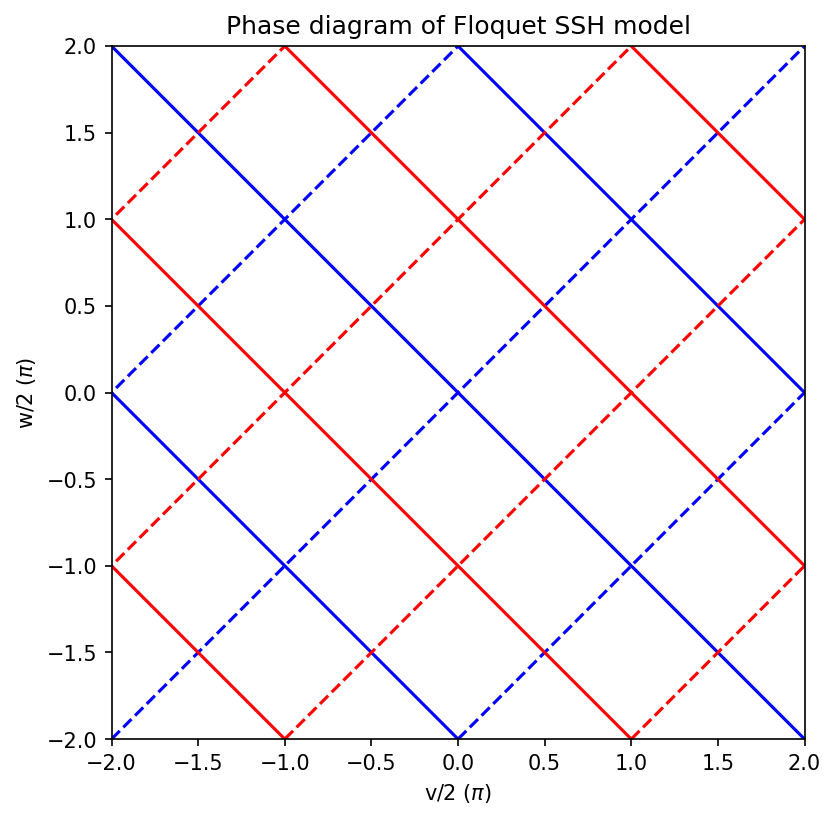

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# V=v/2, W=w/2 (= pi/2 - beta)

V = np.linspace(-4*np.pi,4*np.pi,101)
lines = range(-2,3,1)

fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=150)

for m in lines: # bandgap closes at E=0 k=0
    W = -V+2*m*np.pi
    ax.plot(V/np.pi,W/np.pi,color='blue',linestyle='-')

for m in lines: # bandgap closes at E=0 k=pi
    W = V-2*m*np.pi
    ax.plot(V/np.pi,W/np.pi,color='blue',linestyle='--')

for m in lines: # bandgap closes at E=pi k=0
    W = -V+np.pi+2*m*np.pi
    ax.plot(V/np.pi,W/np.pi,color='red',linestyle='-')

for m in lines: # bandgap closes at E=pi k=pi
    W = V-np.pi-2*m*np.pi
    ax.plot(V/np.pi,W/np.pi,color='red',linestyle='--')

ax.set_title("Phase diagram of Floquet SSH model")
ax.set_xlabel(r"v/2 ($\pi$)")
ax.set_ylabel(r"w/2 ($\pi$)")
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal', 'box')
plt.show()


The above figure shows an unfinished phase diagram, which only shows when the phase can change due to closing of a bandgap. The blue solid line corresponds to close at $E=0,k=0$, the blue dashed line corresponds to close at $E=0,k=\pm \pi$, the red solid line corresponds to close at $E=\pm \pi,k=0$, and the red dashed line corresponds to close at $E=\pm \pi,k=\pm \pi$. 

Let's analyze the symmetry of the Hamiltonian.

The chiral symmetry is defined by
$$
S^{-1}H(k,t)S = -H(k,-t)
$$
where $S$ is a unitary matrix. We can check that for our system 
$$
S = \sigma_z
$$
During the period $0\le t < \frac{1}{4} $ and $\frac{3}{4} \le t < 1$ when $v$ is activated, we have
$$\begin{aligned}
S^{-1}H(k,t)S &= \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 0 & v \\ v & 0 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \\
&= -\begin{pmatrix} 0 & v \\ v & 0 \end{pmatrix} = -H(k,-t)
\end{aligned}$$
During the period $\frac{1}{4}\le t < \frac{3}{4} $ when $w$ is activated, we have
$$\begin{aligned}
S^{-1}H(k,t)S &= \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 0 & we^{-ik} \\ we^{ik} & 0 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \\
&= -\begin{pmatrix} 0 & we^{-ik} \\ we^{ik} & 0 \end{pmatrix} = -H(k,-t)
\end{aligned}$$
Notice that $H(k,t)=H(k,-t)$ due to our choice of the time origin. 

A consequence of the chiral symmetry is that the eigenvalues of the full-period time evolution operator or the effective Hamiltonian are in pairs. If $\lvert \psi_n \rangle$ is an eigenvector of $H^{\mathrm{eff}}_{\epsilon=0}(k)$ with eigenvalue $E_n(k)$, then due to the chiral symmetry 
$$
\sigma_z H^{\mathrm{eff}}_{\epsilon}(k) \sigma_z = -H^{\mathrm{eff}}_{-\epsilon}(k) + \frac{2\pi}{T}
$$
we have $ H^{\mathrm{eff}}_{\epsilon=0}(k) \sigma_z = -\sigma_zH^{\mathrm{eff}}_{\epsilon=0}(k) + 2\pi\sigma_z$. Therefore,
$$\begin{aligned}
H^{\mathrm{eff}}_{\epsilon=0}(k) \sigma_z \lvert \psi_n \rangle &= -\sigma_zH^{\mathrm{eff}}_{\epsilon=0}(k) \lvert \psi_n \rangle + 2\pi\sigma_z \lvert \psi_n \rangle \\
&= (-E_n(k)+2\pi)\sigma_z \lvert \psi_n \rangle 
\end{aligned}$$
So $\sigma_z \lvert \psi_n \rangle $ is also an eigenvector with eigenvalue $-E_n(k)+2\pi$. Due to the periodicity of the quasienergy, the dispersion relation is symmetric around $E = q\pi$ in which $q$ is an integer. As a result, the bandgap will only close at these quasienergy values.


For the particle-hole symmetry and the time-reversal symmetry, we check $C=\sigma_z$ and $T=I$, respectively, they should satisfy (Is the $H^\ast$ complex conjugate or complex conjugate plus transpose???)
$$\begin{aligned}
C^{-1}H(k,t)C &= -H^{\ast}(-k,t) \\
T^{-1}H(k,t)T &= H^{\ast}(-k,-t)
\end{aligned}$$


The topological invariants are affiliated with the gap quasienergy. It is defined as the winding number of the component of the periodized time evolution operator at $t=\frac{T}{2}$ (see ref for details). The periodized time evolution operator is
$$
U_{\epsilon}(k,t) = U(k,t)e^{iH_{\epsilon}^{\mathrm{eff}}(k)t}
$$
where $H_{\epsilon}^{\mathrm{eff}}(k)$ is the effective Hamiltonian, derived from the full-period time evolution operator $U(k,t=T)$. We also need to calculate the evolution operator at $t=\frac{1}{2}$, which is
$$\begin{aligned}
U(k,t=\frac{1}{2}) &= e^{-i\frac{1}{4}(w\cos(k)\sigma_x + w\sin(k)\sigma_y)}e^{-i\frac{1}{4}v\sigma_x}\\
&= \left[\cos(\frac{v}{4})\cos(\frac{w}{4})-\sin(\frac{v}{4})\sin(\frac{w}{4})\cos(k)\right]I \\
&\, -i\left[\sin(\frac{v}{4})\cos(\frac{w}{4})+\cos(\frac{v}{4})\sin(\frac{w}{4})\cos(k)\right]\sigma_x \\
&\, -i\cos(\frac{v}{4})\sin(\frac{w}{4})\sin(k)\sigma_y \\
&\, +i\sin(\frac{v}{4})\sin(\frac{w}{4})\sin(k)\sigma_z 
\end{aligned}$$
Finally, the invariants are calculated numerically using the equation for AIII class (chiral class) after specifying $v,w$ in the phase diagram. Before showing the complete phase diagram with the topological invariants $\Z\times \Z$, let's plot the $U_\epsilon^{+}(k)$ for different $v,w$. Its winding number around the origin gives the topological invariant. The arrows in the figures show the direction of the trajectory at $k=0$ when $k$ changing from $0$ to $2\pi$.

For $v=0.2\pi,w=1.2\pi$:
<img src="v0.2w1.2.png" width="82%"/>

For $v=0.7\pi,w=1.7\pi$:
<img src="v0.7w1.7.png" width="82%"/>

For $v=1.8\pi,w=0.9\pi$:
<img src="v1.8w0.9.png" width="82%"/>

For $v=0.9\pi,w=0.3\pi$:
<img src="v0.9w0.3.png" width="82%"/>

We label each phase with its topological invariants $(Q_0,Q_\pi)$:
<img src="phase diagram.png" width="82%"/>

It's clear that the closing of the bandgap leads to change of the topological invariant affiliated with that gap. There are 4 phases in total.

Next: see the edge state in the simulation of two phases with distinct topological invariants. 

### Nonlinear potential

$$\begin{aligned}
a_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(a_n^m + ib_n^m)e^{i\kappa\left|a_n^m + ib_n^m \right|^2/2} \\
b_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(ia_{n+2}^m + b_{n+2}^m)e^{i\kappa\left|ia_{n+2}^m + b_{n+2}^m \right|^2/2} \\
\end{aligned}$$


### Time evolution 

To calculate the evolution of the synthetic lattice under certain excitation, we use two arrays to store the complex amplitude of the pulses during each roundtrip in the long and short loops, respectively. The arrays for all roundtrips are stacked together to form the whole evolution trajectory. To begin, we first define some variables used in the calculation. 

$N$: length of the lattice and pulse array 

$M$: number of roundtrips, the excitation is defined as roundtrip 0 and will be propagated for M steps 

To avoid the boundary effect, $N$ should be larger than $2M+x$ for an excitation near the center of the lattice. One can use absorbing boundary conditions or reflective boundary conditions (which is used in the schematic above) to model the boundary. Periodic boundary condition can not be implemented in the experiment.

How to introduce an interface? Here, the interface between two different lattice is introduced at one lattice position $n$. Imagine we connect two mesh lattice shown in the figure side by side with couplers. These couplers are at the position $n$.



In [81]:
import numpy as np
import sys

def prop_one_step(Lattice,N,in_field_long,in_field_short,m,bc="abs"):
    # m is an indicator which goes through the function without being modified
    # so that it may be used for tracking the step in Floquet modulation
    out_field_long = np.zeros(N, dtype=np.complex128)
    out_field_short = np.zeros(N, dtype=np.complex128)

    array_lattice_length = []
    for lattice in Lattice:
        # creating an array for the length of each pieces of lattice
        array_lattice_length.append(lattice[1])

    n_start = 1 # note that python counts from 0 rather than 1
    for ind_lat, len_lat in enumerate(array_lattice_length):
        n_end = n_start + len_lat - 1
        for ii in range(n_start,n_end+1): # note that python counts from 0 rather than 1
            if m%2 == 1 and ii%2 == 0: # no boundary, only to bulk or to interface coupler
                if Lattice[ind_lat][0] == "interface" or Lattice[ind_lat][0] == "interface left" or Lattice[ind_lat][0] == "interface right":
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat-1],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat+1],in_field_long[ii],in_field_short[ii],m)
                else:
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)

            elif m%2 == 0 and ii%2 == 1: # there is boundary and another two kinds of interface
                if ii == 1: # left boundary
                    out_field_long[ii-1] = 0 # absorbing boundary
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)
                elif ii == N: # right boundary
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = 0 # absorbing boundary
                elif ii == n_end: # left side of interface
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    if Lattice[ind_lat+1][0] == "interface right":
                        out_field_short[ii-1] = prop_bulk_short(
                            Lattice[ind_lat+2],in_field_long[ii],in_field_short[ii],m)
                    elif Lattice[ind_lat+1][0] == "interface left":
                        out_field_short[ii-1] = prop_bulk_short(
                            Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)
                    else:
                        out_field_short[ii-1] = prop_bulk_short(
                            ["simple"],in_field_long[ii],in_field_short[ii],m)
                elif ii == n_start: # right side of interface
                    if Lattice[ind_lat-1][0] == "interface right":
                        out_field_long[ii-1] = prop_bulk_long(
                            Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    elif Lattice[ind_lat-1][0] == "interface left":
                        out_field_long[ii-1] = prop_bulk_long(
                            Lattice[ind_lat-2],in_field_long[ii-2],in_field_short[ii-2],m)
                    else:
                        out_field_long[ii-1] = prop_bulk_long(
                            ["simple"],in_field_long[ii-2],in_field_short[ii-2],m) 
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)
                else:
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)
        n_start = n_end + 1
   
    return out_field_long, out_field_short, m

def prop_bulk_long(lattice,long,short,m):
    if lattice[0] == "simple":
        out_pulse_long = np.sqrt(dBtofactor(lattice[2]))*coupler_simple_long(long,short)
    elif lattice[0] == "nonlinear potential":
        kappa = lattice[2]
        out_pulse_long = coupler_nonlinear_potential_long(long,short,kappa)
    elif lattice[0] == "SSH":
        out_pulse_long = coupler_SSH_long(long,short,m,lattice[2],lattice[3])
    elif lattice[0] == "NALM":
        kappa = lattice[2]
        alpha = np.sqrt(dBtofactor(lattice[3]))
        phase_nonrec = lattice[4]
        out_pulse_long = coupler_NALM_long(long, short,kappa,alpha,phase_nonrec)
    elif lattice[0] == "NOLM":
        kappa = lattice[2]
        beta1 = lattice[3]
        beta2 = lattice[4]
        phase_nonrec = lattice[5]
        out_pulse_long = coupler_NOLM_long(long, short,kappa,beta1,beta2,phase_nonrec)
    else:
        sys.exit(f"Undefined lattice type: {lattice[0]}.")
    return out_pulse_long

def prop_bulk_short(lattice,long,short,m):
    if lattice[0] == "simple":
        out_pulse_short = np.sqrt(dBtofactor(lattice[3]))*coupler_simple_short(long,short)
    elif lattice[0] == "nonlinear potential":
        kappa = lattice[2]
        out_pulse_short = coupler_nonlinear_potential_short(long,short,kappa)
    elif lattice[0] == "SSH":
        out_pulse_short = coupler_SSH_short(long,short,m,lattice[2],lattice[3])
    elif lattice[0] == "NALM":
        kappa = lattice[2]
        alpha = np.sqrt(dBtofactor(lattice[3]))
        phase_nonrec = lattice[4]
        out_pulse_short = coupler_NALM_short(long, short,kappa,alpha,phase_nonrec)
    elif lattice[0] == "NOLM":
        kappa = lattice[2]
        beta1 = lattice[3]
        beta2 = lattice[4]
        phase_nonrec = lattice[5]
        out_pulse_short = coupler_NOLM_short(long, short,kappa,beta1,beta2,phase_nonrec)
    else:
        sys.exit(f"Undefined lattice type: {lattice[0]}.")
    return out_pulse_short


def coupler_simple_long(in_pulse_long,in_pulse_short):
    out_pulse_long = (in_pulse_long + 1j*in_pulse_short)/np.sqrt(2)
    # out_pulse_long = (in_pulse_long + in_pulse_short)/np.sqrt(2)
    return out_pulse_long

def coupler_simple_short(in_pulse_long,in_pulse_short):
    out_pulse_short = (1j*in_pulse_long + in_pulse_short)/np.sqrt(2)
    # out_pulse_short = (in_pulse_long - in_pulse_short)/np.sqrt(2)
    return out_pulse_short

def coupler_nonlinear_potential_long(in_pulse_long, in_pulse_short,kappa):
    amp_linear = (in_pulse_long + 1j*in_pulse_short)/np.sqrt(2)
    out_pulse_long = amp_linear*np.exp(1j*kappa*(abs(amp_linear)**2))
    return out_pulse_long

def coupler_nonlinear_potential_short(in_pulse_long, in_pulse_short,kappa):
    amp_linear = (1j*in_pulse_long + in_pulse_short)/np.sqrt(2)
    out_pulse_short = amp_linear*np.exp(1j*kappa*(abs(amp_linear)**2))
    return out_pulse_short

def coupler_SSH_long(in_pulse_long,in_pulse_short,m,beta_o,beta_e):
    if m%2 == 1: # m is odd (1,3,5,...)
        out_pulse_long = (np.cos(beta_o)*in_pulse_long 
                          + 1j*np.sin(beta_o)*in_pulse_short)
    else: # m is even (2,4,6,...)
        out_pulse_long = (np.cos(beta_e)*in_pulse_long 
                          + 1j*np.sin(beta_e)*in_pulse_short)
    return out_pulse_long

def coupler_SSH_short(in_pulse_long,in_pulse_short,m,beta_o,beta_e):
    if m%2 == 1: # m is odd (1,3,5,...)
        out_pulse_short = (np.cos(beta_o)*in_pulse_short
                          + 1j*np.sin(beta_o)*in_pulse_long)
    else: # m is even (2,4,6,...)
        out_pulse_short = (np.cos(beta_e)*in_pulse_short
                          + 1j*np.sin(beta_e)*in_pulse_long)
    return out_pulse_short


#############################################################################
def coupler_NALM_long(in_pulse_long, in_pulse_short,kappa,alpha,phase_nonrec):
    # phase_nonrec is ΔΦ_CW - ΔΦ_CCW induced by nonreciprocal phase shifter in loop
    # the global Φ_CCW in Φ_0 is neglected since it's same for all input
    # a port: long loop, b port: short loop
    phi_0 = kappa* (abs(1j*in_pulse_long+in_pulse_short)**2) /2
    phi_alpha = kappa*(alpha**2)* (abs(in_pulse_long+1j*in_pulse_short)**2) /2 + phase_nonrec
    temp = np.exp(1j*(phi_alpha-phi_0))  # e^{iΔΦ}
    
    # out_pulse_long = alpha/2*np.exp(1j*phi_0)*( 1j*(1+temp)*in_pulse_long+(1-temp)*in_pulse_short )
    out_pulse_long = 1/2*np.exp(1j*phi_0)*( 1j*(1+temp)*in_pulse_long+(1-temp)*in_pulse_short )
    
    return out_pulse_long

def coupler_NALM_short(in_pulse_long, in_pulse_short,kappa,alpha,phase_nonrec):
    # phase_nonrec is ΔΦ_CW - ΔΦ_CCW induced by nonreciprocal phase shifter in loop
    # the global Φ_CCW in Φ_0 is neglected since it's same for all input
    # a port: long loop, b port: short loop
    phi_0 = kappa* (abs(1j*in_pulse_long+in_pulse_short)**2) /2
    phi_alpha = kappa*(alpha**2)* (abs(in_pulse_long+1j*in_pulse_short)**2) /2 + phase_nonrec
    temp = np.exp(1j*(phi_alpha-phi_0))  # e^{iΔΦ}
    
    # out_pulse_short = alpha/2*np.exp(1j*phi_0)*( (temp-1)*in_pulse_long+1j*(1+temp)*in_pulse_short )
    out_pulse_short = 1/2*np.exp(1j*phi_0)*( (temp-1)*in_pulse_long+1j*(1+temp)*in_pulse_short )
    
    return out_pulse_short

def coupler_NOLM_long(in_pulse_long, in_pulse_short,kappa,beta1,beta2,phase_nonrec):
    # phase_nonrec is ΔΦ_CW - ΔΦ_CCW induced by nonreciprocal phase shifter in loop
    # the global Φ_CCW in Φ_0 is neglected (=0) since it's same for all input
    phi_0 = kappa* (abs(1j*np.sin(beta1)*in_pulse_long+np.cos(beta1)*in_pulse_short)**2)
    delta_phi = kappa*(abs(np.cos(beta1)*in_pulse_long+1j*np.sin(beta1)*in_pulse_short)**2)-phi_0+phase_nonrec
    temp = np.exp(1j*delta_phi)

    out_pulse_long = np.exp(1j*phi_0)*( (1j*np.sin(beta1)*np.cos(beta2)
                                         +1j*np.cos(beta1)*np.sin(beta2)*temp)*in_pulse_long
                                          +(np.cos(beta1)*np.cos(beta2)
                                            -np.sin(beta1)*np.sin(beta2)*temp)*in_pulse_short )
    return out_pulse_long

def coupler_NOLM_short(in_pulse_long, in_pulse_short,kappa,beta1,beta2,phase_nonrec):
    # phase_nonrec is ΔΦ_CW - ΔΦ_CCW induced by nonreciprocal phase shifter in loop
    phi_0 = kappa* (abs(1j*np.sin(beta1)*in_pulse_long+np.cos(beta1)*in_pulse_short)**2)
    delta_phi = kappa*(abs(np.cos(beta1)*in_pulse_long+1j*np.sin(beta1)*in_pulse_short)**2)-phi_0+phase_nonrec
    temp = np.exp(1j*delta_phi)

    out_pulse_short = np.exp(1j*phi_0)*( (-np.sin(beta1)*np.sin(beta2)
                                         +np.cos(beta1)*np.cos(beta2)*temp)*in_pulse_long
                                          +(1j*np.cos(beta1)*np.sin(beta2)
                                            +1j*np.sin(beta1)*np.cos(beta2)*temp)*in_pulse_short )
    return out_pulse_short
#############################################################################

def dBtofactor(dB):
    factor = np.power(10,dB/10)
    return factor


def initialize_excitation(Excitations,N):
    field_long = np.zeros(N, dtype=np.complex128)
    field_short = np.zeros(N, dtype=np.complex128)
    for excitation in Excitations:
        if excitation[0] == "single long":
            ind = excitation[1] - 1 # python counts from 0 by default
            field_long[ind] = field_long[ind] + np.sqrt(excitation[2])
        elif excitation[0] == "single short":
            ind = excitation[1] - 1
            field_short[ind] = field_short[ind] + np.sqrt(excitation[2])
        else:
            sys.exit("Undefined excitation type.")

    return field_long, field_short

def get_lattice_length(Lattice):
    N = 0
    for lattice in Lattice:
        N = N + lattice[1]
    if isinstance(N,int) == False:
        sys.exit("Lattice length should be an integer.")
    return N


#########################################################
#########################################################
# define the lattice structure
# lattice length MUST BE ODD number, count from 1 rather than 0 
Lattice = [
    # ["simple",111,0,0], # type, n, gain/loss (dB) in long loop, gain/loss (dB) in short loop
    # ["nonlinear potential",111,6], # type, n, kappa=1.5 for 1km, 1W, SMF
    ["SSH",55,0.25*np.pi,0.35*np.pi], # type, n, beta_o, beta_e 
    ["interface left",1],
    ["SSH",55,-0.75*np.pi,-0.65*np.pi],
    # ["simple",55],
    # ["interface",1],
    # ["interface right",1], the interface coupler goes with the right lattice type
    # ["simple",55]
    # ["NALM",111,6,6,np.pi/2]  # name, n, kappa, power gain (dB), nonreciprocal phase difference, try 0.18 W for soliton
    # ["NOLM",111,6,0.22*np.pi,0.22*np.pi,0.5*np.pi] # name, n, kappa, beta1, beta2, nonreciprocal phase difference
]

# define the excitation
Excitations = [  # excitation position MUST BE ODD numbers
    ["single long",57,10e-3],  # type, n, power=1 for 1W, 1e-3 for 1mW
    # ["single short",11,1],
] # ["Gaussian long",55,10]

# set number of roundtrips
M = 50

#########################################################
#########################################################


N = get_lattice_length(Lattice) # number of sites (n)
print(f"Lattice length = {N}")

in_field_long, in_field_short = initialize_excitation(Excitations,N)


evolution_long = np.zeros((1+M,N),dtype=np.complex128)
evolution_long[0] = in_field_long
evolution_short = np.zeros((1+M,N),dtype=np.complex128)
evolution_short[0] = in_field_short
m = 1
while m<=M:
    out_field_long, out_field_short, m = prop_one_step(Lattice,N,
                                                       in_field_long,
                                                       in_field_short,
                                                       m)
    evolution_long[m] = out_field_long
    evolution_short[m] = out_field_short
    in_field_long = out_field_long
    in_field_short = out_field_short
    m = m+1


Lattice length = 111


In [82]:
# check energy conservation 
check_step = M
E_start = (np.sum(np.square(np.absolute(evolution_long[0])))
           + np.sum(np.square(np.absolute(evolution_short[0]))))

E_end = (np.sum(np.square(np.absolute(evolution_long[check_step])))
         + np.sum(np.square(np.absolute(evolution_short[check_step]))))

print(f"Initial energy: {1e3*E_start}mW\nEnergy after {check_step} steps: {1e3*E_end}mW")

Initial energy: 10.000000000000002mW
Energy after 50 steps: 9.999999999999991mW


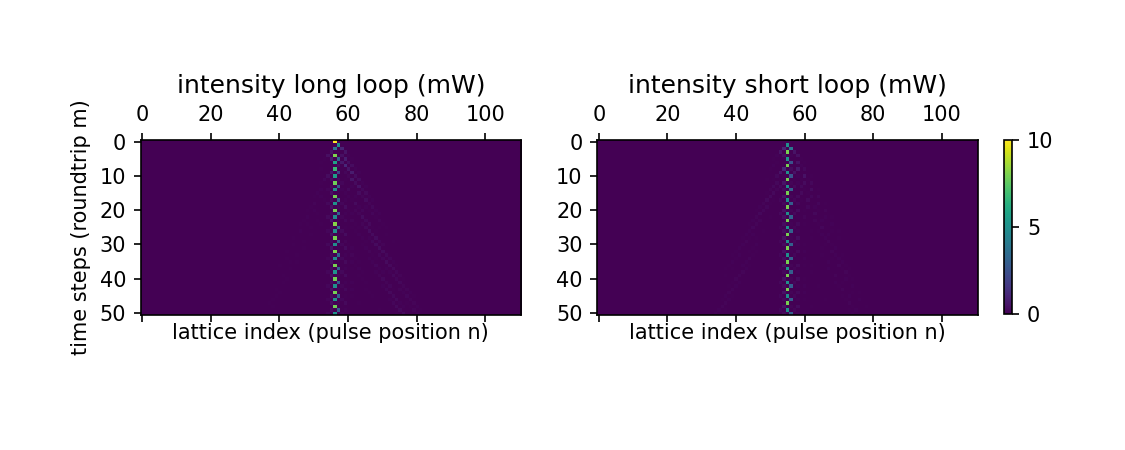

In [83]:
# plot
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib widget 

power_long = np.square(np.absolute(evolution_long))
power_short = np.square(np.absolute(evolution_short))
power_max = np.max([power_long, power_short])

fig, ax = plt.subplots(1,2,figsize=(7.5,3),dpi=150)
img = ax[0].matshow(power_long*1e3, vmin=0, vmax = power_max*1e3)
ax[0].set_title("intensity long loop (mW)")
ax[0].set_xlabel("lattice index (pulse position n)")
ax[0].set_ylabel("time steps (roundtrip m)")
ax[1].matshow(power_short*1e3, vmin=0, vmax = power_max*1e3)
ax[1].set_title("intensity short loop (mW)")
ax[1].set_xlabel("lattice index (pulse position n)")
fig.colorbar(img,ax=[ax[0],ax[1]],fraction=0.01,pad=0.03,ticks=[10,5,0])
plt.show()

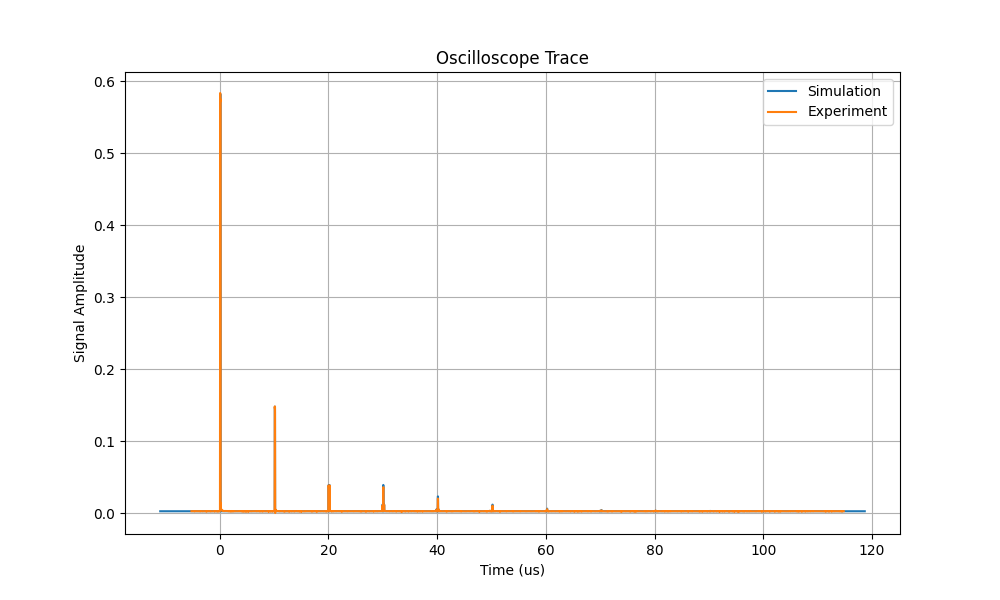

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# plot oscilloscope trace
pulse_width = 50e-9 # in seconds
roundtrip_time = 9.97e-6
loop_time_difference = 150e-9 # distance between the neighboring pulses

# parameters to match with the experimental data
t_bias = -970e-9
s_scale = 58
s_background = 0.0025 

exp_data = np.genfromtxt('exp-data.csv', delimiter=',', skip_header=1)

power_long = np.square(np.absolute(evolution_long))
power_short = np.square(np.absolute(evolution_short))

def add_square_pulse(trace_t, pulse_trace, start_time, pulse_width, amplitude):
    # Find indices corresponding to the pulse start and end times
    start_index = np.argmin(np.abs(trace_t - start_time))
    end_index = np.argmin(np.abs(trace_t - (start_time + pulse_width)))
    
    # Set the pulse amplitude for the specified time range
    pulse_trace[start_index:end_index] = amplitude
    
    return pulse_trace


sample_time = 5e-9 # distance between data points

trace_t = np.arange(-1*roundtrip_time,(M+2)*roundtrip_time,sample_time)
trace_s = np.zeros_like(trace_t)

for (i, j), element in np.ndenumerate(power_long):
    start_time = i*roundtrip_time + j*loop_time_difference/2
    trace_s = add_square_pulse(trace_t,trace_s,start_time,pulse_width,element)

trace_t = trace_t + t_bias
trace_s = trace_s*s_scale + s_background

plt.figure(figsize=(10, 6))
plt.plot(trace_t*1e6, trace_s, label='Simulation')
plt.plot(exp_data[:, 0]*1e6, exp_data[:, 1], label='Experiment')
plt.xlabel('Time (us)')
plt.ylabel('Signal Amplitude')
plt.title('Oscilloscope Trace')
plt.legend()
plt.grid(True)
plt.show()


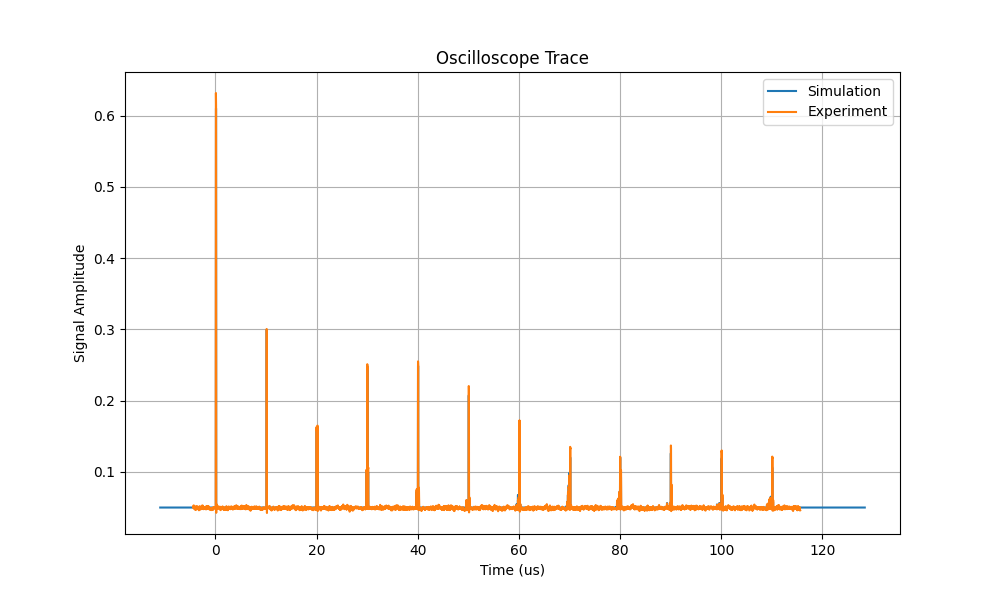

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# plot oscilloscope trace
pulse_width = 50e-9 # in seconds
roundtrip_time = 9.95e-6
loop_time_difference = 150e-9 # distance between the neighboring pulses

# parameters to match with the experimental data
t_bias = -970e-9
s_scale = 56
s_background = 0.05

exp_data = np.genfromtxt('exp-data-old.csv', delimiter=',', skip_header=1)

power_long = np.square(np.absolute(evolution_long))
power_short = np.square(np.absolute(evolution_short))

def add_square_pulse(trace_t, pulse_trace, start_time, pulse_width, amplitude):
    # Find indices corresponding to the pulse start and end times
    start_index = np.argmin(np.abs(trace_t - start_time))
    end_index = np.argmin(np.abs(trace_t - (start_time + pulse_width)))
    
    # Set the pulse amplitude for the specified time range
    pulse_trace[start_index:end_index] = amplitude
    
    return pulse_trace


sample_time = 5e-9 # distance between data points

trace_t = np.arange(-1*roundtrip_time,(M+2)*roundtrip_time,sample_time)
trace_s = np.zeros_like(trace_t)

for (i, j), element in np.ndenumerate(power_long):
    start_time = i*roundtrip_time + j*loop_time_difference/2
    trace_s = add_square_pulse(trace_t,trace_s,start_time,pulse_width,element)

trace_t = trace_t + t_bias
trace_s = trace_s*s_scale + s_background

plt.figure(figsize=(10, 6))
plt.plot(trace_t*1e6, trace_s, label='Simulation')
plt.plot(exp_data[:, 0]*1e6, exp_data[:, 1], label='Experiment')
plt.xlabel('Time (us)')
plt.ylabel('Signal Amplitude')
plt.title('Oscilloscope Trace')
plt.legend()
plt.grid(True)
plt.show()


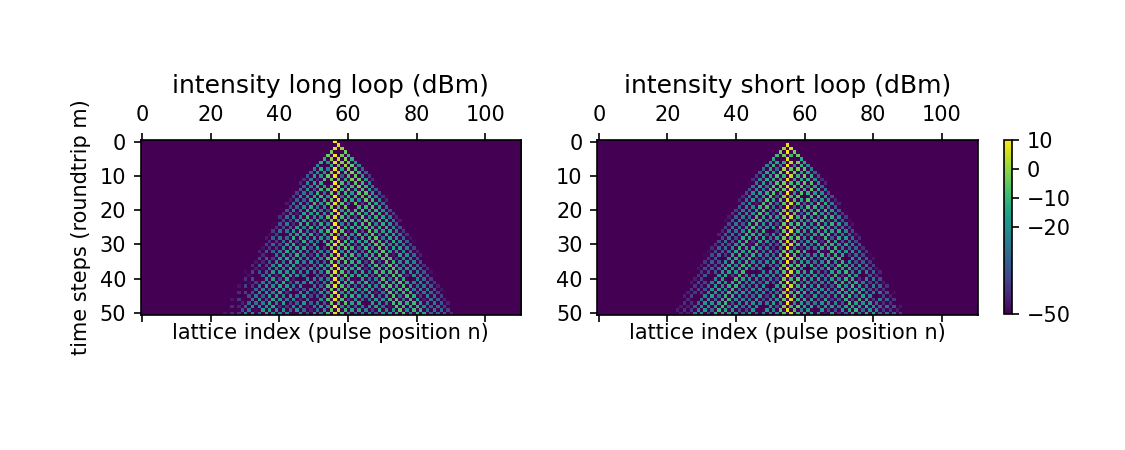

In [84]:
# plot log scale
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib widget 

power_long = np.square(np.absolute(evolution_long))
power_short = np.square(np.absolute(evolution_short))

lb = 10e-9 # lower bound of color map: 10nW
ub = np.max([power_long, power_short]) # upper bound of color map

power_long[power_long<lb]=lb
power_long[power_long>ub]=ub
power_short[power_short<lb]=lb
power_short[power_short>ub]=ub

lb_log = 10*np.log10( lb/1e-3 )
ub_log = 10*np.log10( ub/1e-3 )

fig, ax = plt.subplots(1,2,figsize=(7.5,3),dpi=150)
img = ax[0].matshow(10*np.log10( power_long/1e-3 ),vmin=lb_log,vmax=ub_log)
ax[0].set_title("intensity long loop (dBm)")
ax[0].set_xlabel("lattice index (pulse position n)")
ax[0].set_ylabel("time steps (roundtrip m)")
ax[1].matshow(10*np.log10( power_short/1e-3 ),vmin=lb_log,vmax=ub_log)
ax[1].set_title("intensity short loop (dBm)")
ax[1].set_xlabel("lattice index (pulse position n)")
fig.colorbar(img,ax=[ax[0],ax[1]],fraction=0.01,pad=0.03,ticks=[10,0,-10,-20,-50])
plt.show()

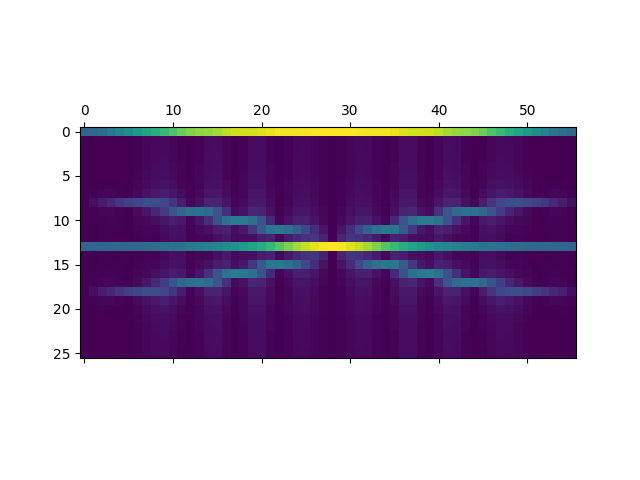

In [85]:
# FFT to show band structure when using point excitation
# Perform 2D FFT
matrix = evolution_short[0::2,0::2]
fft_result = np.fft.fft2(matrix)

# Shift zero-frequency component to the center
# fft_shifted = np.fft.fftshift(fft_result)

# Magnitude Spectrum (absolute value)
magnitude_spectrum = np.abs(fft_result)

fig, ax = plt.subplots()
ax.matshow(magnitude_spectrum)
plt.show()

In [ ]:
# save figure to current folder
import os
cwd = os.getcwd()
# plt.savefig(os.path.join(cwd, 'light_walk_basic.png'))